**Load the Package**

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

**Load the datasets**

In [12]:
customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")

transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")

**Merge the datasets on CustomerID**

In [13]:
merged_data = pd.merge(customers, transactions, on='CustomerID')
merged_data['TransactionCount'] = merged_data.groupby('CustomerID')['TransactionID'].transform('count')
merged_data['TotalValue'] = merged_data.groupby('CustomerID')['TotalValue'].transform('sum')
merged_data['SignupDays'] = (pd.to_datetime('today') - pd.to_datetime(merged_data['SignupDate'])).dt.days

**Standardize the features**

In [14]:
features = ['TotalValue', 'TransactionCount', 'SignupDays']
X = merged_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Apply KMeans clustering**

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [19]:
db_index = davies_bouldin_score(X_scaled, merged_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0272910654838572


**Visualize clusters**

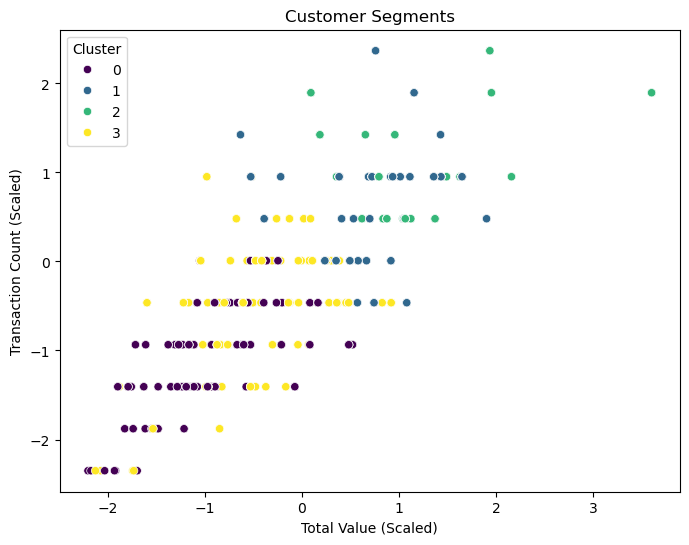

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=merged_data['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Value (Scaled)')
plt.ylabel('Transaction Count (Scaled)')
plt.show()


**Add the cluster labels to the original merged_data**

In [22]:
segment_mapping = {}
for cluster_id in range(merged_data['Cluster'].nunique()):
    segment = merged_data[merged_data['Cluster'] == cluster_id]['CustomerID'].tolist()
    segment_mapping[cluster_id] = segment

# Display the customer segments mapping
for cluster_id, customers_in_segment in segment_mapping.items():
    print(f"Cluster {cluster_id}: {len(customers_in_segment)} customers")

# Optionally, map the segments to the original dataframe
merged_data['Segment'] = merged_data['Cluster'].map(segment_mapping)

# Display the first few rows of the final data with segments
print(merged_data[['CustomerID', 'Segment']].head())

Cluster 0: 258 customers
Cluster 1: 236 customers
Cluster 2: 157 customers
Cluster 3: 349 customers
  CustomerID                                            Segment
0      C0001  [C0001, C0001, C0001, C0001, C0001, C0002, C00...
1      C0001  [C0001, C0001, C0001, C0001, C0001, C0002, C00...
2      C0001  [C0001, C0001, C0001, C0001, C0001, C0002, C00...
3      C0001  [C0001, C0001, C0001, C0001, C0001, C0002, C00...
4      C0001  [C0001, C0001, C0001, C0001, C0001, C0002, C00...


**Create a bar plot to visualize the distribution of customers customer count**

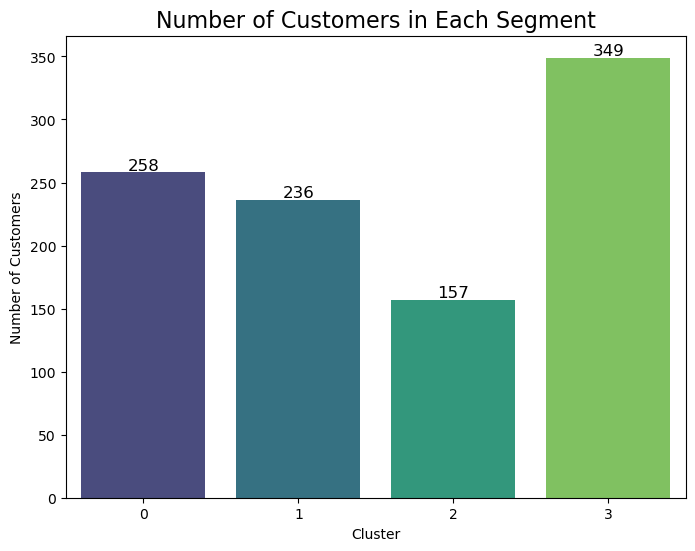

In [28]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Number of Customers in Each Segment', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()
